# Business Understanding

## Project Domain : Prediksi nilai matematika siswa berdasarkan karakteristik sosial dan akademik.

## Problem Statements : Bagaimana memprediksi skor matematika siswa dari data demografi dan persiapan akademik?

## Goals : Membangun model ANN regresi dengan akurasi tinggi (R² ≥ 0.80)

## Solution Statements : Menggunakan ANN dengan fitur: gender, etnis, pendidikan orang tua, makan siang, persiapan ujian, dsb

## Business value: Sekolah dapat mengidentifikasi siswa yang berisiko mendapatkan nilai rendah.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annajmreyhan","key":"fcca516b6dd86bd69421cf30f4a3c909"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d rkiattisak/student-performance-in-mathematics

Dataset URL: https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics
License(s): other
  0% 0.00/8.66k [00:00<?, ?B/s]
100% 8.66k/8.66k [00:00<00:00, 33.1MB/s]


In [4]:
!mkdir student-performance-in-mathematics
!unzip student-performance-in-mathematics.zip -d student-performance-in-mathematics
!ls student-performance-in-mathematics

Archive:  student-performance-in-mathematics.zip
  inflating: student-performance-in-mathematics/exams.csv  
exams.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import joblib
import os

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/student-performance-in-mathematics.zip')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


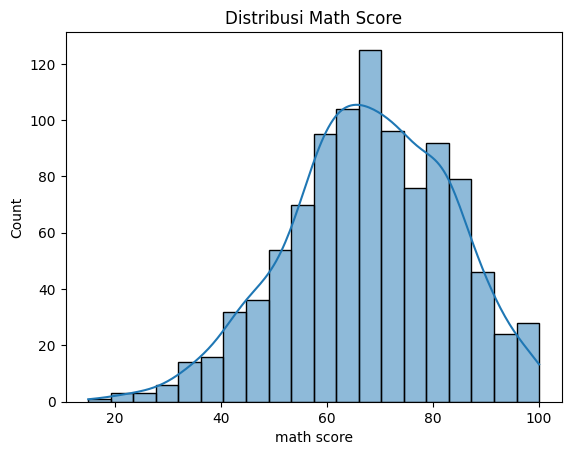

In [7]:
sns.histplot(df['math score'], bins=20, kde=True)
plt.title("Distribusi Math Score")
plt.show()

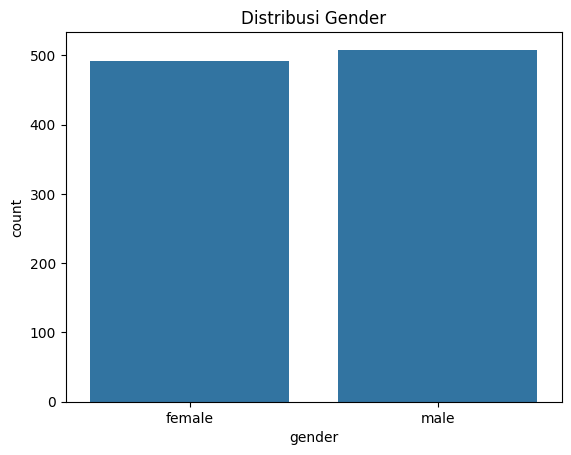

In [8]:
sns.countplot(x='gender', data=df)
plt.title("Distribusi Gender")
plt.show()

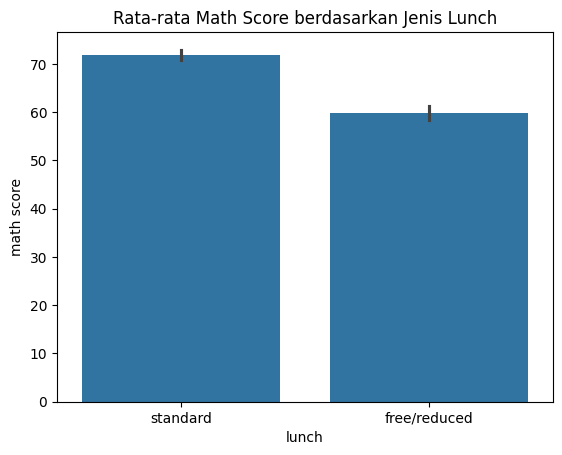

In [9]:
sns.barplot(x='lunch', y='math score', data=df)
plt.title("Rata-rata Math Score berdasarkan Jenis Lunch")
plt.show()

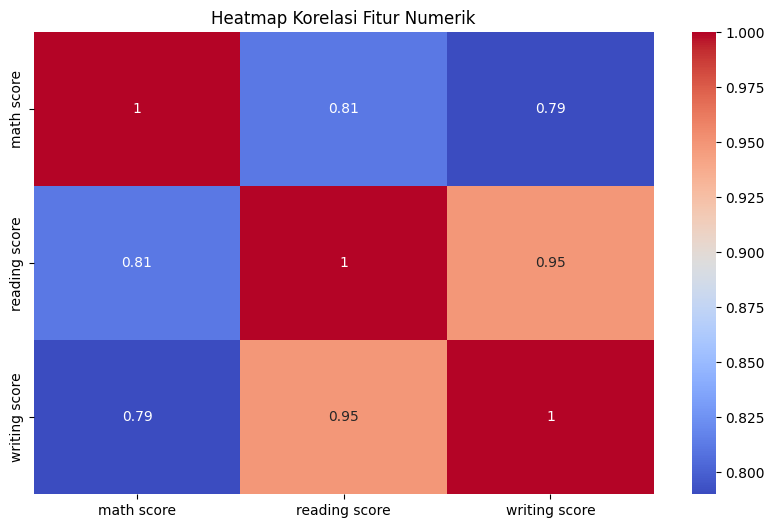

In [10]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

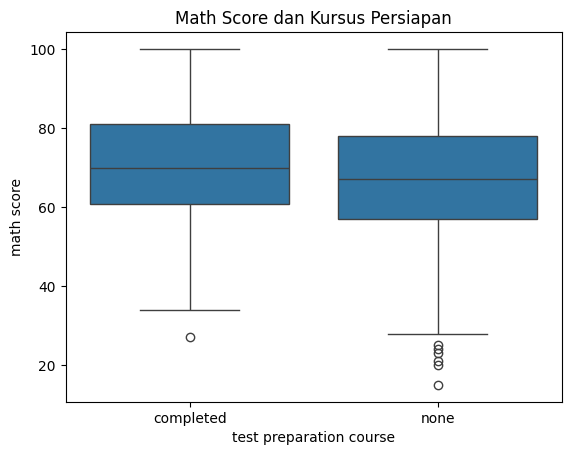

In [11]:
sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score dan Kursus Persiapan")
plt.show()

# Data Preparation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [13]:
df_encoded = df.copy()
label_cols = df_encoded.select_dtypes(include='object').columns
for col in label_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

In [14]:
X = df_encoded.drop('math score', axis=1)
y = df_encoded['math score'].apply(lambda x: 1 if x >= 70 else 0)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [17]:
print("Mean:", scaler.mean_)
print("Std:", scaler.scale_)

Mean: [ 0.508  2.187  2.541  0.66   0.656 70.382 69.14 ]
Std: [ 0.499936    1.14369183  1.78670619  0.47370877  0.47504105 14.1003573
 15.01840205]


# Modeling

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5622 - loss: 0.6709 - val_accuracy: 0.8300 - val_loss: 0.5400
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8154 - loss: 0.4919 - val_accuracy: 0.8450 - val_loss: 0.4118
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.3662 - val_accuracy: 0.8600 - val_loss: 0.3253
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8718 - loss: 0.3054 - val_accuracy: 0.8850 - val_loss: 0.2782
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8701 - loss: 0.2929 - val_accuracy: 0.8850 - val_loss: 0.2513
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8813 - loss: 0.2551 - val_accuracy: 0.9000 - val_loss: 0.2393
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8889 - loss: 0.2477 - val_accuracy: 0.8950 - val_loss: 0.2320
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9144 - loss: 0.2239 - val_accuracy: 0.8900 - val_loss

# Evaluation

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Uji: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8832 - loss: 0.2310 
Akurasi Uji: 0.89


In [22]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Confusion Matrix:
[[85 13]
 [ 9 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        98
           1       0.88      0.91      0.89       102

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



# Deployment

## Model Simulation

## Save Model

In [23]:
model.save("edupredict_model.h5")

In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpft2pzr8v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 7), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  138119831121424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138122381148816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138119760283216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138119760283792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138119831119504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  138119760282256: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [25]:
with open("edupredict_model.tflite", "wb") as f:
    f.write(tflite_model)